# Classification of players using K-Means

### Problem statement
Using the player attributes, group players into clusters. We can then predict the playing position of a player given their attributes.




### Standard imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from const import *

pd.set_option('display.max_columns', 500) # show all dataframe columns

---------
## Load data

In [2]:
df = pd.read_csv("data/1. processed/data_clean.csv")
df.head()

player_id                            name  age  overall_rating  potential  \
0     229558        Dayotchanculle Upamecano   19              77         88   
1     230767       Renato Júnior Luz Sanches   20              75         84   
2     237221               Juan Marcos Foyth   20              74         85   
3     228736                 Wuilker Faríñez   20              73         87   
4     189509  Thiago Alcântara do Nascimento   27              87         87   

   likes  dislikes  followers  value_clean  wage_clean  Crossing  Finishing  \
0     96         5       1190   13000000.0     18000.0        47         39   
1    370        33       3075   10000000.0     41000.0        60         65   
2     44         0        374    8500000.0     40000.0        41         43   
3    110         3        572    7500000.0      2000.0        18         19   
4    109         6        818   51500000.0    140000.0        72         69   

   Heading Accuracy  Short Passing  Volleys  Dribbling  Curve  FK Accuracy  \
0                71             72       21         59     32           28   
1                64             76       68         77     59           68   
2                74             73       43         68     41           47   
3                17             25       15         14     22           18   
4                54             90       90         90     85           77   

   Long Passing  Ball Control  Acceleration  Sprint Speed  Agility  Reactions  \
0            66            64            73            85       61         67   
1            70            77            79            77       76         72   
2            53            73            71            71       72         73   
3            29            25            49            54       69         65   
4            87            90            78            69       90         86   

   Balance  Shot Power  Jumping  Stamina  Strength  Long Shots  Aggression  \
0       62          44       86       61        88          24          81   
1       90          85       79       86        76          77          90   
2       72          56       72       65        71          39          61   
3       65          25       75       39        51          20          23   
4       86          76       75       75        59          79          56   

   Interceptions  Positioning  Vision  Penalties  Composure  Marking  \
0             75           35      56         39         68       68   
1             69           70      67         68         68       73   
2             74           46      52         47         57       73   
3             17           15      66         23         45       25   
4             78           79      86         75         85       67   

   Standing Tackle  Sliding Tackle  GK Diving  GK Handling  GK Kicking  \
0               84              75          6            7           8   
1               70              64          5           12           6   
2               76              72          8           15           7   
3               16              21         73           70          69   
4               67              71          6           11           7   

   GK Positioning  GK Reflexes  
0              15            9  
1              13           14  
2              14            9  
3              74           77  
4               9           13

---------------
## Data preparation

For this analysis we just want to use the player attributes for classification

In [3]:
kmeans_df = df[ATTRIBUTES]
kmeans_df.head()

Crossing  Finishing  Heading Accuracy  Short Passing  Volleys  Dribbling  \
0        47         39                71             72       21         59   
1        60         65                64             76       68         77   
2        41         43                74             73       43         68   
3        18         19                17             25       15         14   
4        72         69                54             90       90         90   

   Curve  FK Accuracy  Long Passing  Ball Control  Acceleration  Sprint Speed  \
0     32           28            66            64            73            85   
1     59           68            70            77            79            77   
2     41           47            53            73            71            71   
3     22           18            29            25            49            54   
4     85           77            87            90            78            69   

   Agility  Reactions  Balance  Shot Power  Jumping  Stamina  Strength  \
0       61         67       62          44       86       61        88   
1       76         72       90          85       79       86        76   
2       72         73       72          56       72       65        71   
3       69         65       65          25       75       39        51   
4       90         86       86          76       75       75        59   

   Long Shots  Aggression  Interceptions  Positioning  Vision  Penalties  \
0          24          81             75           35      56         39   
1          77          90             69           70      67         68   
2          39          61             74           46      52         47   
3          20          23             17           15      66         23   
4          79          56             78           79      86         75   

   Composure  Marking  Standing Tackle  Sliding Tackle  GK Diving  \
0         68       68               84              75          6   
1         68       73               70              64          5   
2         57       73               76              72          8   
3         45       25               16              21         73   
4         85       67               67              71          6   

   GK Handling  GK Kicking  GK Positioning  GK Reflexes  
0            7           8              15            9  
1           12           6              13           14  
2           15           7              14            9  
3           70          69              74           77  
4           11           7               9           13

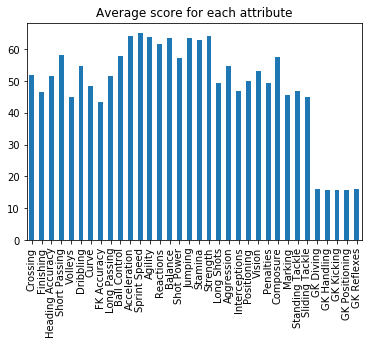

In [4]:
kmeans_df.mean().plot.bar()
plt.title("Average score for each attribute")
plt.show()

The chart above shows that the average score for each attribute is about 50, except for the goal keeping attributes which are much lower. Presumably because there are more outfield players in the sample and tend to have very low goal keeping attribute scores.

The kmeans algorithm works by calculating the (Euclidean)distances between datapoints. The algorithm can be biased towards attributes with higher absolute values, therefore we need to normalize the data so no attribute has an exaggerated effect on the overall distance.

I will use the z-normalisation which scales each column to have a mean of approximately 0 and a standard deviation of approximately 1.

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
kmeans_df_transformed = kmeans_df.astype('float64')

scaler = MinMaxScaler()
kmeans_df_transformed = scaler.fit_transform(kmeans_df_transformed)

In [6]:
kmeans_df_transformed = pd.DataFrame(kmeans_df_transformed,columns=ATTRIBUTES)
kmeans_df_transformed.describe()

Crossing     Finishing  Heading Accuracy  Short Passing  \
count  21009.000000  21009.000000      21009.000000   21009.000000   
mean       0.529045      0.478927          0.530087       0.603211   
std        0.205450      0.205406          0.193223       0.169254   
min        0.000000      0.000000          0.000000       0.000000   
25%        0.402299      0.311828          0.433333       0.534091   
50%        0.586207      0.516129          0.566667       0.647727   
75%        0.678161      0.645161          0.666667       0.715909   
max        1.000000      1.000000          1.000000       1.000000   

            Volleys     Dribbling         Curve   FK Accuracy  Long Passing  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean       0.467043      0.546087      0.488484      0.444763      0.524848   
std        0.195865      0.202799      0.204368      0.190420      0.181914   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.322222      0.451613      0.348315      0.307692      0.390805   
50%        0.477778      0.602151      0.505618      0.428571      0.563218   
75%        0.622222      0.688172      0.651685      0.593407      0.666667   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       Ball Control  Acceleration  Sprint Speed       Agility     Reactions  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean       0.581002      0.621879      0.632128      0.621778      0.547971   
std        0.182769      0.175892      0.170850      0.170024      0.130486   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.516484      0.528736      0.547619      0.529412      0.460526   
50%        0.626374      0.655172      0.666667      0.647059      0.552632   
75%        0.703297      0.747126      0.750000      0.741176      0.631579   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

            Balance    Shot Power       Jumping       Stamina      Strength  \
count  21009.000000  21009.000000  21009.000000  21009.000000  21009.000000   
mean       0.614607      0.592542      0.646124      0.598355      0.595024   
std        0.164290      0.180798      0.144763      0.176749      0.160614   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.511905      0.494624      0.573034      0.505882      0.506173   
50%        0.630952      0.634409      0.662921      0.623529      0.604938   
75%        0.726190      0.720430      0.741573      0.717647      0.703704   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         Long Shots    Aggression  Interceptions   Positioning        Vision  \
count  21009.000000  21009.000000   21009.000000  21009.000000  21009.000000   
mean       0.511119      0.544709       0.485616      0.515630      0.545494   
std        0.208922      0.193970       0.227325      0.206914      0.163053   
min        0.000000      0.000000       0.000000      0.000000      0.000000   
25%        0.362637      0.406593       0.266667      0.387097      0.444444   
50%        0.560440      0.571429       0.533333      0.569892      0.566667   
75%        0.670330      0.692308       0.677778      0.666667      0.666667   
max        1.000000      1.000000       1.000000      1.000000      1.000000   

          Penalties     Composure       Marking  Standing Tackle  \
count  21009.000000  21009.000000  21009.000000     21009.000000   
mean       0.498485      0.554252      0.469457         0.492071   
std        0.174390      0.147994      0.221215         0.235406   
min        0.000000      0.000000      0.000000         0.000000   
25%        0.393258      0.465116      0.263736         0.263736   
50%        0.505618      0.569767      0.505495         0.549451   
75%        0.629213      0.662791      0.659341

The mean and standard deviation of each column are now 0 and 1 respectively

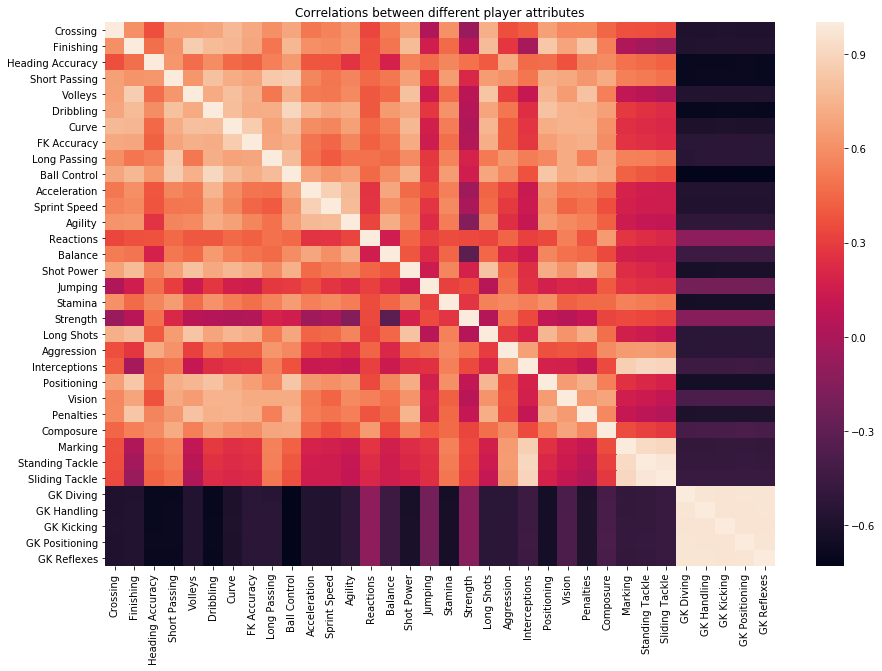

In [7]:
plt.figure(figsize=(15,10))
sns.heatmap(kmeans_df_transformed.corr())
plt.title("Correlations between different player attributes")
plt.show()

As expected goal keeping attributes are negatively correlated to outfield attributes

## Kmeans - clustering

In [8]:
from sklearn.cluster import KMeans

distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(kmeans_df_transformed)
    distances.append(km.inertia_)

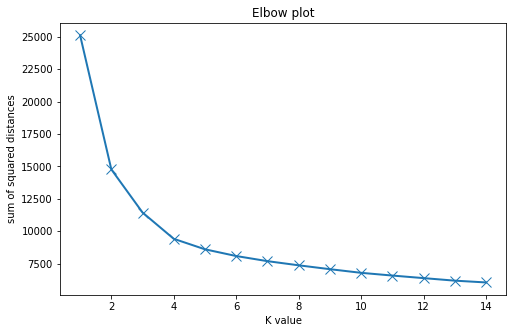

In [9]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(1,15),distances,marker='x',linewidth=2,markersize=10)
plt.title('Elbow plot')
plt.xlabel('K value')
plt.ylabel('sum of squared distances')
plt.show()

The optimal k value for the data appears to be k=4. This might be expected as traditionally there are four main types of playing position: striker; midfielder; defender and goal keeper.

In [29]:
km = KMeans(n_clusters=4,random_state=0)
km = km.fit(kmeans_df_transformed)
labels = km.labels_

__PCA analysis__

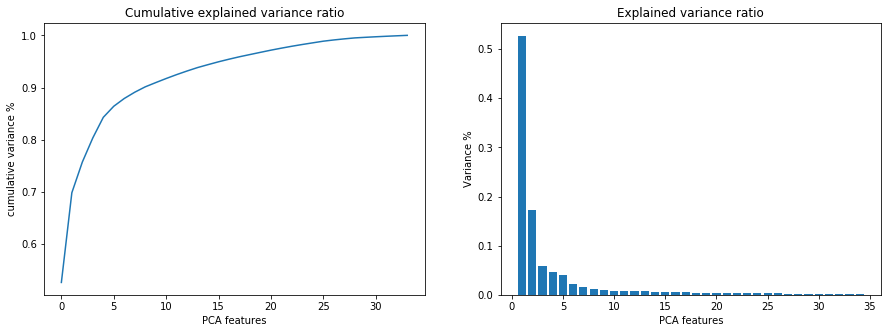

In [35]:
from sklearn.decomposition import PCA

pca = PCA()
principalComponents = pca.fit_transform(kmeans_df_transformed)


features = range(1,pca.n_components_+1)

fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))
ax1.plot(np.cumsum(pca.explained_variance_ratio_))
ax1.set_xlabel('PCA features')
ax1.set_ylabel('cumulative variance %')
ax1.set_xticks(features)
ax1.set_title("Cumulative explained variance ratio")
ax1.set_xticks(range(0,35,5))

ax2.bar(features, pca.explained_variance_ratio_)
ax2.set_xlabel('PCA features')
ax2.set_ylabel('Variance %')
ax2.set_title("Explained variance ratio")
plt.show()

The variance tails off quickly after 2 PCA features, but about 90% of the variance is accounted for by about 10 of the features.

In [36]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

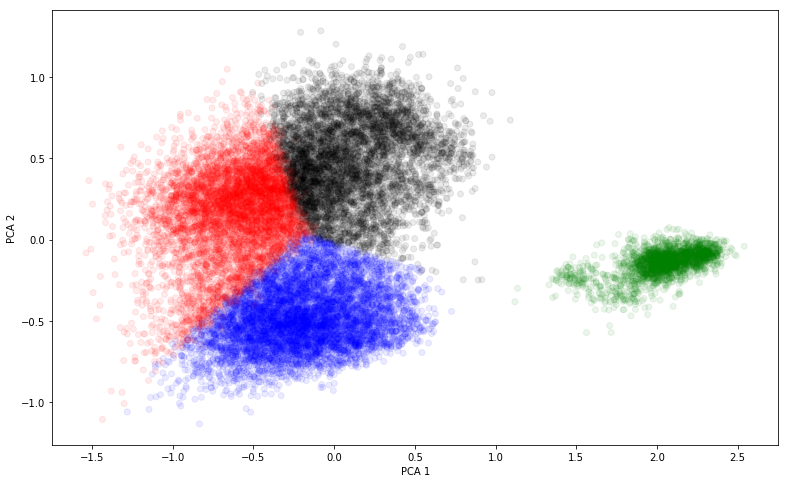

In [37]:
colors = {0:'red', 1:'blue', 2:'green', 3:'black'}

plt.figure(figsize=(13,8))
plt.scatter(PCA_components[0], PCA_components[1], alpha=.08, color=[colors[x] for x in labels])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

__Using 3 PCA dimensions and plot in 3D__

In [38]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
plotly.offline.init_notebook_mode()

data = go.Scatter3d(x=PCA_components[0], y=PCA_components[1], z=PCA_components[2],
                      mode='markers',
                      marker=dict(color=[colors[x] for x in labels],
                                  size=2,
                                 opacity=0.1),
                    text = df['name'])

layout = dict(title="PCA(3) analysis")

fig = go.Figure(data=data,layout=layout)
iplot(fig)